## DATASET senza outliers e senza errori semantici
Abbiamo
- Binarizzato tutte le variabili ad eccezione di Attrition

In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

In [2]:
# mettiamo il dataframe dentro la variabile df
df = pd.read_csv('Test_HR_Employee_Attrition.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       258 non-null    float64
 1   Attrition                 294 non-null    object 
 2   BusinessTravel            270 non-null    object 
 3   DailyRate                 294 non-null    int64  
 4   Department                294 non-null    object 
 5   DistanceFromHome          294 non-null    int64  
 6   Education                 294 non-null    int64  
 7   EducationField            294 non-null    object 
 8   EnvironmentSatisfaction   294 non-null    int64  
 9   Gender                    278 non-null    object 
 10  HourlyRate                294 non-null    int64  
 11  JobInvolvement            294 non-null    int64  
 12  JobLevel                  294 non-null    int64  
 13  JobRole                   294 non-null    object 
 14  JobSatisfa

In [4]:
# quanti valori mancanti ci sono per ogni colonna?
df.isnull().sum()

Age                          36
Attrition                     0
BusinessTravel               24
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       16
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                67
MonthlyRate                   0
NumCompaniesWorked            0
Over18                       96
OverTime                      0
PercentSalaryHike             0
PerformanceRating            34
RelationshipSatisfaction      0
StandardHours               147
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear        59
WorkLifeBalance               0
YearsAtCompany               14
YearsInCurrentRole            0
YearsSin

In [5]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000  -0.050883          0.041333   0.016237   
DailyRate                -0.050883   1.000000         -0.085510  -0.023623   
DistanceFromHome          0.041333  -0.085510          1.000000   0.020364   
Education                 0.016237  -0.023623          0.020364   1.000000   
EnvironmentSatisfaction   0.007694  -0.099819         -0.082358   0.073383   
HourlyRate               -0.005546   0.086804          0.006145   0.063112   
JobInvolvement           -0.018802   0.031158          0.085385   0.057966   
JobLevel                 -0.015713   0.051584         -0.044624   0.135128   
JobSatisfaction          -0.070178  -0.025681         -0.035249   0.074762   
MonthlyIncome             0.599610   0.056841          0.002016  -0.007773   
MonthlyRate               0.108948  -0.034422          0.105029  -0.051323   
NumCompaniesWorked       -0.039316   0.013395         -0.078550   0.057382   
PercentSalaryHike         0.015108  -0.112309          0.224062  -0.001473   
PerformanceRating        -0.006219   0.078274         -0.130865  -0.022255   
RelationshipSatisfaction  0.007608   0.030283         -0.022620  -0.069158   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.068957   0.050244         -0.065619   0.077352   
TotalWorkingYears        -0.020463   0.012506         -0.009385   0.161699   
TrainingTimesLastYear    -0.022409  -0.002550          0.051397   0.030506   
WorkLifeBalance           0.046623  -0.003025         -0.025151  -0.056934   
YearsAtCompany            0.264033   0.011632         -0.062184   0.064226   
YearsInCurrentRole       -0.014739   0.033694          0.037397   0.082967   
YearsSinceLastPromotion   0.001512  -0.034150          0.029293   0.132988   
YearsWithCurrManager     -0.025627  -0.075487          0.046152   0.076276   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.007694   -0.005546       -0.018802   
DailyRate                               -0.099819    0.086804        0.031158   
DistanceFromHome                        -0.082358    0.006145        0.085385   
Education                                0.073383    0.063112        0.057966   
EnvironmentSatisfaction                  1.000000   -0.071132       -0.008588   
HourlyRate                              -0.071132    1.000000        0.080843   
JobInvolvement                          -0.008588    0.080843        1.000000   
JobLevel                                -0.123126    0.038063        0.028701   
JobSatisfaction                          0.026437    0.006727       -0.001487   
MonthlyIncome                            0.118768   -0.000248        0.075722   
MonthlyRate                              0.015030   -0.039343       -0.028347   
NumCompaniesWorked                       0.010907   -0.004856        0.009574   
PercentSalaryHike                       -0.008469   -0.033942       -0.061788   
PerformanceRating                       -0.049356   -0.048442       -0.015900   
RelationshipSatisfaction                -0.031469   -0.007236       -0.053914   
StandardHours                                 NaN         NaN             NaN   
StockOptionLevel                        -0.065538    0.148801       -0.063571   
TotalWorkingYears                       -0.130561    0.068170        0.067611   
TrainingTimesLastYear                    0.053270   -0.011123        0.051382   
WorkLifeBalance                         -0.001430    0.039950        0.037059   
YearsAtCompany                           0.036188   -0.009958       -0.041823   
YearsInCurrentRole                      -0.034149   -0.004787        0.036764   
YearsSinceLastPromotion                 -0.058702    0.020604        0.008285   
YearsWithCurrManager                    -0.086837    0.003192        0.041226   

                          JobLevel  JobSatisfaction  M

# outliers

Abbiamo osservato i boxplot e abbiamo deciso che, bene o male, le distribuzioni di test e train sono le stesse. Pertanto manteniamo le stesse soglie per il calcolo degli outliers

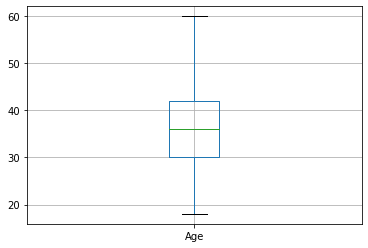

In [4]:
boxplot = df.boxplot(column=['Age'])

In [13]:
i=0
for record in df['Age']:
    if record > 58:
        i+=1
i

1

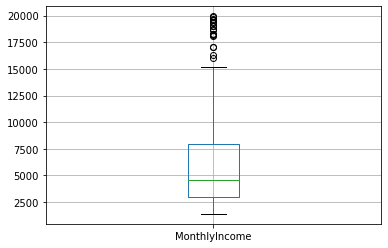

In [5]:
boxplot = df.boxplot(column=['MonthlyIncome'])

In [14]:
i=0
for record in df['MonthlyIncome']:
    if record > 17000:
        i+=1
i

18

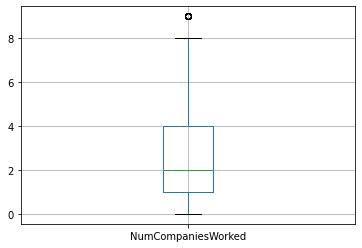

In [6]:
boxplot = df.boxplot(column=['NumCompaniesWorked'])

In [15]:
i=0
for record in df['NumCompaniesWorked']:
    if record > 8:
        i+=1
i

12

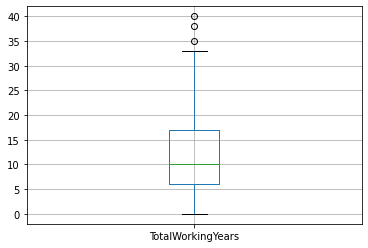

In [7]:
boxplot = df.boxplot(column=['TotalWorkingYears'])

In [16]:
i=0
for record in df['TotalWorkingYears']:
    if record > 28:
        i+=1
i

14

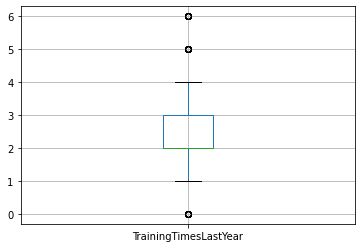

In [8]:
boxplot = df.boxplot(column=['TrainingTimesLastYear'])

In [17]:
i=0
for record in df['TrainingTimesLastYear']:
    if record >= 5:
        i+=1
i

36

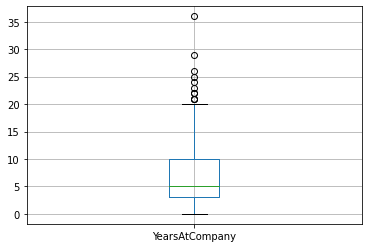

In [9]:
boxplot = df.boxplot(column=['YearsAtCompany'])

In [18]:
i=0
for record in df['YearsAtCompany']:
    if record >= 18:
        i+=1
i

23

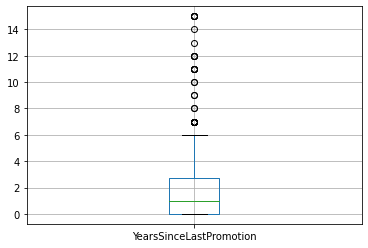

In [10]:
boxplot = df.boxplot(column=['YearsSinceLastPromotion'])

In [19]:
i=0
for record in df['YearsSinceLastPromotion']:
    if record > 7:
        i+=1
i

22

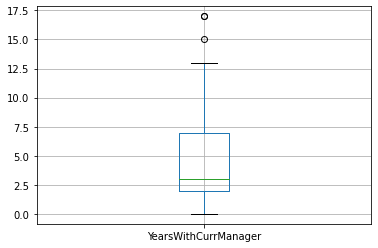

In [11]:
boxplot = df.boxplot(column=['YearsWithCurrManager'])

In [20]:
i=0
for record in df['YearsWithCurrManager']:
    if record > 13:
        i+=1
i

3

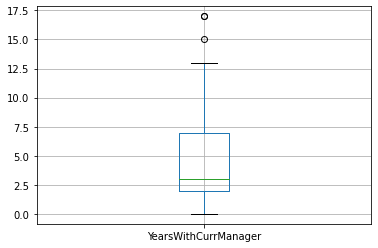

In [12]:
boxplot = df.boxplot(column=['YearsWithCurrManager'])

In [21]:
i=0
for record in df['YearsInCurrentRole']:
    if record > 14:
        i+=1
i

4

Abbiamo eliminato gli outliers manualmente usando excel.

In [26]:
df = pd.read_csv('Test_NoOutliers.csv', sep = ";")

### Missing values

In [27]:
# AGE: sostituiamo con la media
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [28]:
# BUSINESS TRAVEL: sostituiamo con il valore più frequente (moda = Travel_Rarely)
i = 0
for record in df['BusinessTravel']:
    if not pd.notnull(record):
        df.at[i, 'BusinessTravel'] = "Travel_Rarely"
    i += 1

In [29]:
# GENDER: sostituiamo i valori mancanti con ND (Not Defined)
i = 0
for record in df['Gender']:
    if not pd.notnull(record):
        df.at[i, 'Gender'] = "ND"
    i += 1

In [30]:
# TRAINING TIME LAST YEARS: abbiamo raggruppato per Departement e riempito i missing values con la moda (valore più frequente) di ogni gruppo
i = 0
for record in df['TrainingTimesLastYear']:
    if not pd.notnull(record):
        if df.at[i, 'Department'] == "Human Resources":
            df.at[i, 'TrainingTimesLastYear'] = 3.0
        elif df.at[i, 'Department'] == "Research & Development":
            df.at[i, 'TrainingTimesLastYear'] = 2.0
        elif df.at[i, 'Department'] == "Sales":
            df.at[i, 'TrainingTimesLastYear'] = 2.0
    i += 1

In [31]:
# YEARS AT COMPANY: abbiamo creato 5 gruppi a seconda di Age e sostituiamo con la media di ogni gruppo
i = 0
for record in df['YearsAtCompany']:
    if not pd.notnull(record):
        if df.at[i,'Age'] < 21:
            df.at[i, 'YearsAtCompany']= 1
        elif df.at[i,'Age'] < 31:
            df.at[i, 'YearsAtCompany']= 3
        elif df.at[i,'Age'] < 41:
            df.at[i, 'YearsAtCompany']= 10
        elif df.at[i,'Age'] < 51:
            df.at[i, 'YearsAtCompany']= 8
        elif df.at[i,'Age'] < 61:
            df.at[i, 'YearsAtCompany']= 10
    i += 1

In [32]:
# MONTHLY INCOME: abbiamo fatto regressione con YearsAtCompany
i=0
X = df.values # mettiamo i valori in un numphy array per recuperarli più agevolmente
for record in df['MonthlyIncome']:
    if not pd.notnull(record):
        record = 391.4 * X[i, 29] + 3763.8
        df.at[i, 'MonthlyIncome'] = record
    i += 1

In [33]:
# vediamo se ci sono ancora missing values
df.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                      64
OverTime                     0
PercentSalaryHike            0
PerformanceRating           22
RelationshipSatisfaction     0
StandardHours               99
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWit

### Sistemiamo  i formati

In [34]:
df['Age']= df['Age'].astype('int32')

In [35]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype('int32')

In [36]:
df['JobLevel'] = df['JobLevel'].astype('int32')

In [37]:
df['DailyRate'] = df['DailyRate'].astype('int32')

In [38]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype('int32')

In [39]:
df['Education'] = df['Education'].astype('int32')

In [40]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('int32')

In [41]:
df['HourlyRate'] = df['HourlyRate'].astype('int32')

In [42]:
df['JobInvolvement'] = df['JobInvolvement'].astype('int32')

In [43]:
df['JobLevel'] = df['JobLevel'].astype('int32')

In [44]:
df['JobSatisfaction'] = df['JobSatisfaction'].astype('int32')

In [45]:
df['MonthlyRate'] = df['MonthlyRate'].astype('int32')

In [46]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype('int32')

In [47]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype('int32')

In [48]:
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype('int32')

In [49]:
df['StockOptionLevel'] = df['StockOptionLevel'].astype('int32')

In [50]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype('int32')

In [51]:
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('int32')

In [52]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].astype('int32')

In [53]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].astype('int32')

In [54]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].astype('int32')

In [55]:
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype('int32')

In [56]:
df['YearsAtCompany'] = df['YearsAtCompany'].astype('int32')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       200 non-null    int32  
 1   Attrition                 200 non-null    object 
 2   BusinessTravel            200 non-null    object 
 3   DailyRate                 200 non-null    int32  
 4   Department                200 non-null    object 
 5   DistanceFromHome          200 non-null    int32  
 6   Education                 200 non-null    int32  
 7   EducationField            200 non-null    object 
 8   EnvironmentSatisfaction   200 non-null    int32  
 9   Gender                    200 non-null    object 
 10  HourlyRate                200 non-null    int32  
 11  JobInvolvement            200 non-null    int32  
 12  JobLevel                  200 non-null    int32  
 13  JobRole                   200 non-null    object 
 14  JobSatisfa

## Data Transformation

#### Sistemiamo i valori ND del Gender precedentemente modificati

In [58]:
i =0
contand=0
for nd in df['Gender']:
    if nd == 'ND':
        contand+=1
        if contand < 32:
            nd = df.at[i,'Gender']='Male'
        elif contand >=32:
            nd = df.at[i,'Gender']='Female'
    i+=1

In [59]:
for record in df['Gender']:
    if record =='ND':
        print('errore')
    else:
        print('ok')

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


## BINARIZZAZIONE

In [60]:
# 0 uomini
# 1 donne
i = 0
for record in df['Gender']:
    if record == "Male":
        df.at[i, 'Gender'] = "0"
    elif record == "Female":
        df.at[i, 'Gender'] = "1"
    i += 1

df['Gender']

0      0
1      0
2      0
3      0
4      1
      ..
195    1
196    0
197    0
198    0
199    1
Name: Gender, Length: 200, dtype: object

In [61]:
# trasformiamo il dtype perchè dopo binarizzazione
# dtype = object e ci darebbe errori per fare 
# correlazione con altre variabli numeriche
df['Gender'] = df['Gender'].astype('int32')

In [62]:
# 0 no
# 1 yes
i = 0
for record in df['OverTime']:
    if record == "No":
        df.at[i, 'OverTime'] = "0"
    elif record == "Yes":
        df.at[i, 'OverTime'] = "1"
    i += 1

df['OverTime']

0      1
1      0
2      0
3      0
4      1
      ..
195    0
196    0
197    0
198    1
199    0
Name: OverTime, Length: 200, dtype: object

In [63]:
# trasformiamo il dtype perchè dopo binarizzazione
# dtype = object e ci darebbe errori per fare 
# correlazione con altre variabli numeriche
df['OverTime'] = df['OverTime'].astype('int32')

# Correzione errori semantici

In [65]:
i = 0
for record in df['Age']:
    if record < (df.at[i, 'TotalWorkingYears'] + 18):
        df.at[i, 'TotalWorkingYears'] = record - 18
    i += 1

# ------------------------------------------------------------------------------------
i = 0
for record in df['YearsAtCompany']:
    if record > df.at[i, 'TotalWorkingYears'] and df.at[i, 'NumCompaniesWorked'] == 0:
        sostituzione = df.at[i, 'TotalWorkingYears']
        df.at[i, 'YearsAtCompany'] = sostituzione
    i += 1

i = 0
for record in df['YearsAtCompany']:
    if record > df.at[i, 'TotalWorkingYears'] and df.at[i, 'NumCompaniesWorked'] != 0:
        sostituzione = df.at[i, 'TotalWorkingYears']
        df.at[i, 'YearsAtCompany'] = sostituzione
        df.at[i, 'NumCompaniesWorked'] = 0
    i += 1
# ------------------------------------------------------------------------------------    
i = 0
for record in df['YearsWithCurrManager']:
    if record > df.at[i, 'YearsAtCompany']:
        sostituzione = df.at[i, 'YearsAtCompany']
        df.at[i, 'YearsWithCurrManager'] = sostituzione
    i += 1
    
i = 0
for record in df['YearsSinceLastPromotion']:
    if record > df.at[i, 'YearsAtCompany']:
        sostituzione = df.at[i, 'YearsAtCompany']
        df.at[i, 'YearsSinceLastPromotion'] = sostituzione
    i += 1
    
i = 0
for record in df['YearsInCurrentRole']:
    if record > df.at[i, 'YearsAtCompany']:
        sostituzione = df.at[i, 'YearsAtCompany']
        df.at[i, 'YearsInCurrentRole'] = sostituzione
    i += 1

# Aggiunta di Stagnation

In [66]:
# Stagnation
array_stagnation = []
i = 0
for record in df['YearsSinceLastPromotion']:
    stagnation = record * df.at[i, 'YearsInCurrentRole']
    array_stagnation.append(stagnation)
    i += 1
    
mdf_df = df.assign(Stagnation = array_stagnation)

# Eliminazione variabili ridondanti

In [67]:
mdf_df = mdf_df.drop(columns =['DailyRate', 'MonthlyRate', 'HourlyRate','Over18', 'StandardHours', 'PerformanceRating', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobLevel'])

In [68]:
mdf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       200 non-null    int32 
 1   Attrition                 200 non-null    object
 2   BusinessTravel            200 non-null    object
 3   Department                200 non-null    object
 4   DistanceFromHome          200 non-null    int32 
 5   Education                 200 non-null    int32 
 6   EducationField            200 non-null    object
 7   EnvironmentSatisfaction   200 non-null    int32 
 8   Gender                    200 non-null    int32 
 9   JobInvolvement            200 non-null    int32 
 10  JobRole                   200 non-null    object
 11  JobSatisfaction           200 non-null    int32 
 12  MaritalStatus             200 non-null    object
 13  MonthlyIncome             200 non-null    int32 
 14  NumCompaniesWorked        

In [69]:
# salviamo df in un nuovo csv
mdf_df.to_csv('Test_pulito2_senzaOut.csv', index=False) 